**<h1><center> PROBLEMA DEL ENCUENTRO. </center></h1>**

Flores Carmona Jorge Emilio




Dos personas han quedado citas en un determinado lugar. Ambas tienen la misma
probabilidad de llegar al lugar de la cita en el intervalo de tiempo [0, 30].
Determínese la probabilidad de que el tiempo que una persona espere a la otra sea como máximo 10.

### Solución por simulación

**1.** Identificamos las variables

$t_1 =$ Tiempo de llegada de la primer persona

$t_2 =$ Tiempo de llegada de la segunda persona

Las variables anteriores las utilizaremos para realizar la solución por simulacion, para la solucion analitica las cambiaremos a $X$ y $Y$ respectivamente.

**2.** Determine la distribución de probabilidad

Vemos que en este caso se sigue una distribución uniforme, es decir en cualquier momento entre [0,30] minutos, puede llegar cualquiera de las dos personas

Sea $X= t_1$ y $Y=t_2$ que siguen una distribución de probabilidad cada una de 

$$f(X)= \left\{ \begin{array}{lcc}
             \frac{1}{30} &   si  & 0 \leq X \leq 30 \\
             \\ 0 & & en\ otro\ caso
             \end{array}
   \right.$$

Respectivamente:

$$f(Y)= \left\{ \begin{array}{lcc}
             \frac{1}{30} &   si  & 0 \leq Y \leq 30 \\
             \\ 0 & & en\ otro\ caso
             \end{array}
   \right.$$

**3.** Modelamos las variables aleatorias ($t_1$ y $t_2$)

Ya que se trata de una distribucion de probabilidad uniforme generaremos numeros aleatorios entre el 0 y el 30 para modelar la llegada de cada una de las personas al lugar indicado apoyandonos de la siguiente función de la libreria **random** en **Python**

<center> t=random.uniform(a,b) </center>

Con $a=0$ y $b=30$

**4.** Modelo y objetivos del sistemas de simulación

El objetivo del siguiente sistema es simular la llegada de dos personas a un mismo lugar y determinar cual es la probabilidad de que la primer persona que llegué espero como maximo diez minutos a la segunda persona en llegar independientemente de quien haya llegado primero.

Esto quiere decir que si la primer persona llega antes que la segunda persona, la segunda persona debe llegar maximo en un lapso de 10 minutos despues, es decir 

$$X \geq Y-10$$

Y si la segunda persona llega primero entonces seria la misma igualdad de la siguiente forma

$$Y \geq X-10$$

**Despejando** y multiplicando por (-1)

$$X-Y \leq 10$$
$$-(X-Y) \leq 10$$

Es decir el valor absoluto de la resta de los tiempos tiene que ser menor o igual a 10

$$|X-Y| \leq 10$$


**Paso 5**. Experimento: 

1.Generamos numeros aleatorios

In [39]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt

In [40]:
def Tllegada(): #Definimos una función que genere los numeros aleatorios con los intervalos que requerimos
  t=rnd.uniform(0, 30)
  return(t)

2. Simulamos la llegada de las personas



In [41]:
def llegada(): #Definimos la función que simulara la llega de la persona 1 y persona 2
  c=0 #Contador de casos favorables que cumplan la condición definida en el apartado 4
  t1=Tllegada() #Tiempo de llegada de la primer persona
  t2=Tllegada() #Tiempo de llegada de la segunda persona
  if abs(t1-t2)<=10: #|X-Y| <= 10
      c+=1 #Si se cumple la condicion se suma uno a nuestros casos favorables
  return(c)

3. Realizamos el experimento n veces guardando las probabilidades obtenidas de exito



In [42]:
def experimento(n): #Hacemos el experimento n veces
    i = 0 #iterador que determinara las veces que se repetira el experimento
    c=0 #Contador de casos favorables
    Lista = [] #Lista donde se guardaran las probabilidades del caso solicitado
    while i<=n: #Hasta que el iterador sea igual al numero de veces que se repite el experimento este se llevara acabo
        c+=llegada()
        i += 1
        p=c/i #probabilidad acumulativa
        Lista.append(p)
    return Lista 


4. Calculamos la probabilidad con los datos obtenidos hasta el primer experimento

In [45]:
exp=experimento(10000) #repetimos el experimento un total de 10000 veces

In [48]:
print("La probabilidad de que el tiempo de espera sea a lo maximo 10 minutos es de ", np.mean(exp)) #Calculamos el promedio de las probabilidades para determinar nuestro resultado objetivo

La probabilidad de que el tiempo de espera sea a lo maximo 10 minutos es de  0.5552914919066262


5. Obtenemos la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para garantizar la convergencia del resultado.

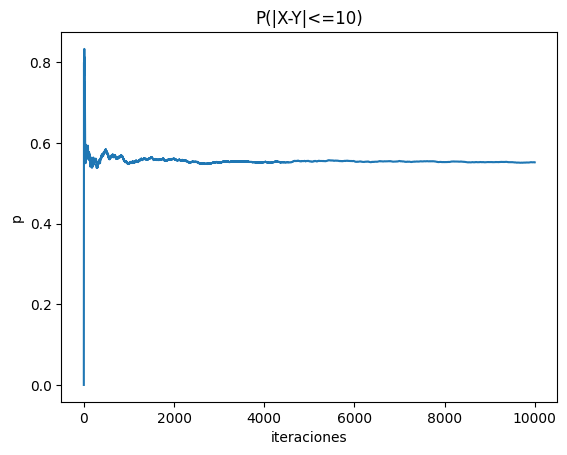

In [47]:
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('P(|X-Y|<=10)')
plt.show()

**PASO 6**. Replicamos el modelo.

In [49]:
def simulacion_llegadas(n):
    List = []
    for i in range(n):
        List.append(np.mean(experimento(10000)))
    return List

In [50]:
simulacion = simulacion_llegadas(500)

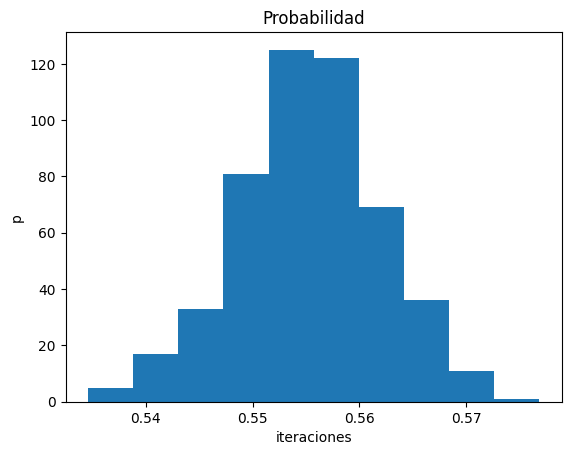

In [51]:
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 7**. Calcule la probabilidad de que el tiempo maximo de espera de una persona que llego antes a un cierto lugar sea de 10 min en lo que llega una segunda persona y su desviación estándar.

In [52]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(0.5552517891312833, 4.483975388471356e-05, 0.006696249240038304)

**PASO 8**. Halle el intervalo de confianza de la probabilidad de queaparezcan dos caras lanzando tres veces una moneda 
al aire con un nivel de confianza del $95 \%$.

Calculamos primero el limite superior del intervalo de confianza con una certeza del 95% usando la siguiente formula 

$$L_{s}=\bar{x}+Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}} \right)$$

In [65]:
p=np.mean(simulacion)
n=500
ls=p+(1.96*np.std(simulacion)/np.sqrt(n))
print(ls)

0.5558387412562875


Calculamos ahora el limite inferior

$$L_{i}=\bar{x}-Z_{\frac{\alpha}{2}} \left(\frac{\sigma}{\sqrt{n}} \right)$$

In [66]:
p=np.mean(simulacion)
n=500
li=p-(1.96*np.std(simulacion)/np.sqrt(n))
print(li)

0.554664837006279


Por lo tanto los intervalos de confianza son:

$$L_{i} \leq P(|X-Y|\leq 10) \leq L_{s}$$

In [67]:
print(li,"<=", p,"<=", ls)

0.554664837006279 <= 0.5552517891312833 <= 0.5558387412562875


### Solución analitica

Ahora el siguiente paso es solucionar analiticamente el siguiente problema

Sean $f(X)$ y $f(Y)$ dos funciones de probabilidad tales que

<h10>
$$f(X)= \left\{ \begin{array}{lcc}
             \frac{1}{30} &   si  & 0 \leq X \leq 30 \\
             \\ 0 & & en\ otro\ caso
             \end{array}
   \right.$$

\\
<h10>
$$f(Y)= \left\{ \begin{array}{lcc}
             \frac{1}{30} &   si  & 0 \leq Y \leq 30 \\
             \\ 0 & & en\ otro\ caso
             \end{array}
   \right.$$


Hallar $P(|X-Y|\leq 10)$


La probabilidad esta dada por la siguiente formula 

$$P(|X-Y|\leq 10)= \int\int_{|X-Y|\leq 10} f(x,y)dx dy$$

Si $f(x,y)$ es una funcion conjunta de la probabilidad de $f(x)$ y $f(y)$ es decir

$f(x,y)=f(x)\cdot f(y)=\left( \frac{1}{30} \right)\left( \frac{1}{30} \right)=\frac{1}{30^{2}}$
